In [1]:
#读取数据
# database_name="all"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"]="Times New Roman"
sns.set_theme(style="darkgrid")
model_name="result"
def load_data(name):
    location="./result/"+name+".csv"
    data=pd.read_csv(location,sep=",").iloc[:,:]
    return data

In [9]:
data_org=load_data(model_name)
# data_org=data_org.drop(data_org[data_org["model"]=="RF"].index,axis=0)
# data_org=data_org.drop(data_org[data_org["model"]=="GRNN"].index,axis=0)
data_use=data_org.drop_duplicates(subset=["ratio","r1"],keep="first")
data_use["ratio"]=data_use["ratio"]*100
data_use["r1"]=data_use["r1"]*100

data_use

<ipython-input-9-75b7dcccfb5b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_use["ratio"]=data_use["ratio"]*100
<ipython-input-9-75b7dcccfb5b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_use["r1"]=data_use["r1"]*100


,ratio,train,test,valid,r1,r2,RMSE,model
0,30.0,92,47,17,4.018703,0.988730,0.024692,BPNN
1,20.0,105,32,19,3.485207,0.991865,0.022575,BPNN
2,25.0,99,39,18,2.674914,0.994984,0.016840,BPNN
3,35.0,85,55,16,3.385699,0.991908,0.020510,BPNN
4,15.0,112,24,20,3.293980,0.992955,0.021556,BPNN
...,...,...,...,...,...,...,...,...
137,40.0,79,63,14,14.800906,0.873720,0.095480,GRNN
138,35.0,85,55,16,7.073392,0.964682,0.042850,ET
139,35.0,85,55,16,2.413365,0.995889,0.014620,BPNN
140,25.0,99,39,18,2.022969,0.997131,0.012736,BPNN


In [10]:
data_use[data_use["model"]=="BPNN"]["r1"].min()

2.0229686994611797

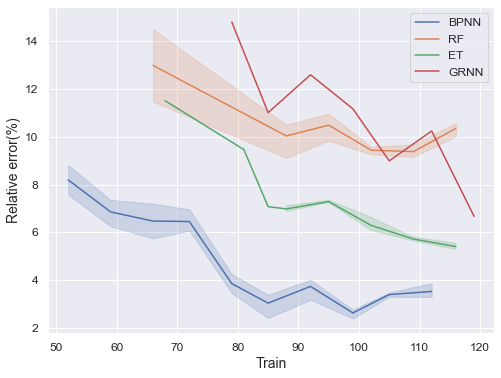

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
g=sns.lineplot(ax=ax,x="train", y="r1",
              hue="model",
             data=data_use)
ax.set_xlabel("Train",fontsize=14)
ax.set_ylabel("Relative error(%)",fontsize=14)
ax.tick_params(labelsize=12)
g.legend(loc=0,fontsize=12)
plt.savefig("./figure/ratio.png",dpi=150,bbox_inches="tight")